In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\python38\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pylab

from uplift.metrics import uplift_at_k,qini_auc_score
from uplift.ensemble import RandomForestClassifier
from uplift.vizualization import  plot_qini_curve

from sklearn.model_selection import ParameterGrid
from pprint import pprint

In [ ]:
# # Functions to build the Uplift model and visualize the QINI Curve

# import plotly.express as px


# from plotly.offline import init_notebook_mode, plot, iplot
# import plotly.graph_objs as go

# init_notebook_mode(connected=True)

# def qini_rank(uplift):
#     """Rank the data by the uplift score
#     """
#     # Creat new dataframe
#     ranked = pd.DataFrame({'n':[], 'target_class':[]})
#     ranked['target_class'] = uplift['target_class']
#     ranked['uplift_score'] = uplift['uplift_score']
    
    
#     # Add proportion
#     ranked['n'] = ranked.uplift_score.rank(pct=True, ascending=False)
   
#     # Data Ranking   
#     ranked = ranked.sort_values(by='n').reset_index(drop=True)

    
#     print(ranked)
#     return ranked


# def qini_eval(ranked):
#     """Evaluate the uplift value with the QINI criterion
#     """
    
#     uplift_model, random_model = ranked.copy(), ranked.copy()
#     # Using Treatment and Control Group to calculate the uplift (Incremental gain)
#     C, T = sum(ranked['target_class'] <= 1), sum(ranked['target_class'] >= 2)
#     ranked['cr'] = 0
#     ranked['tr'] = 0
#     ranked.loc[ranked.target_class == 1,'cr'] = 1
#     ranked.loc[ranked.target_class == 3,'tr'] = 1
#     ranked['cr/c'] = ranked.cr.cumsum() / C
#     ranked['tr/t'] = ranked.tr.cumsum() / T
#     # Calculate and put the uplift and random value into dataframe
#     uplift_model['uplift'] = round(ranked['tr/t'] - ranked['cr/c'],5)
#     random_model['uplift'] = round(ranked['n'] * uplift_model['uplift'].iloc[-1],5)
    
    
#     # Add q0
#     q0 = pd.DataFrame({'n':0, 'uplift':0, 'target_class': None}, index =[0])
#     uplift_model = pd.concat([q0, uplift_model],sort=False).reset_index(drop = True)
#     random_model = pd.concat([q0, random_model],sort=False).reset_index(drop = True)  
#     # Add model name & concat
#     uplift_model['model'] = 'Uplift model'
#     random_model['model'] = 'Random model'
#     merged = pd.concat([uplift_model, random_model]).sort_values(by='n').reset_index(drop = True)
#     merged = merged.groupby(['n','model'],as_index=False).mean()
#     print(merged)
#     return merged


# def qini_plot(merged):
#     """Plot the QINI
#     """

   
  


#     fig = px.line(merged, x="n", y="uplift", color='model', labels={
#                      "n": "ratio",
#                      "uplift": "uplift"
#                  })
    
#     fig.show()
    

    


# def qini(uplift):
#     """Combine all functions
#     """
#     ranked = qini_rank(uplift)
#     merged = qini_eval(ranked)
#     qini_plot(merged)
   

In [3]:
N_ROWS = 25000000 # number of samples

df_dataset = pd.read_csv("DATASETS/criteo-uplift.csv", nrows = N_ROWS)

df_features = pd.DataFrame({
    'f0': df_dataset['f0'],
    'f1': df_dataset['f1'],
    'f2': df_dataset['f2'],
    'f3': df_dataset['f3'],
    'f4': df_dataset['f4'],
    'f5': df_dataset['f5'],
    'f6': df_dataset['f6'],
    'f7': df_dataset['f7'],
    'f8': df_dataset['f8'],
    'f9': df_dataset['f9'],
    'f10': df_dataset['f10'],
    'f11': df_dataset['f11'],
})

df_features_imp = pd.DataFrame({
    'f0': df_dataset['f0'],
    'f1': df_dataset['f1'],
    'f2': df_dataset['f2'],
    'f3': df_dataset['f3'],
    'f4': df_dataset['f4'],
    'f5': df_dataset['f5'],
    'f6': df_dataset['f6'],
    'f7': df_dataset['f7'],
    'f8': df_dataset['f8'],
    'f9': df_dataset['f9'],
    'f10': df_dataset['f10'],
    'f11': df_dataset['f11'],
    'visit':df_dataset['visit'],
    'treatment':df_dataset['treatment']
})

indices_all =  [i for i in range(N_ROWS)]

indices_train, indices_test = train_test_split(
         df_dataset.index,
         test_size=0.3,
         random_state = 12)
print(df_features_imp.loc[ (df_features_imp['treatment'] == 0) ])
# class_balanced_frame = pd.concat([df_features.loc[ (df_features['treatment'] == 1) ])])

                f0        f1        f2        f3        f4         f5  \
4         1.991981  3.263641  9.332619  3.735871  3.506733  10.161281   
6         1.991981  3.263641  9.274632  3.735871  3.506733  10.161281   
8         1.991981  3.263641  9.226277  3.735871  3.506733  10.161281   
11        1.991981  3.263641  9.225938  3.735871  3.506733  10.161281   
21        1.991981  3.263641  9.305200  3.735871  3.506733  10.161281   
25        1.991981  3.263641  9.226143  3.735871  3.506733  10.161281   
36        1.991981  3.263641  9.319042  3.735871  3.506733  10.161281   
37        1.991981  3.263641  9.149571  3.735871  3.506733  10.161281   
38        1.991981  3.263641  9.274588  3.735871  3.506733  10.161281   
40        1.991981  3.263641  9.225908  3.735871  3.506733  10.161281   
44        1.991981  3.263641  9.242269  3.735871  3.506733  10.161281   
51        1.991981  3.263641  9.290252  3.735871  3.506733  10.161281   
63        1.991981  3.263641  9.027589  3.735871  3

In [4]:
control_all = df_features_imp.loc[ (df_features_imp['treatment'] == 0) ]
control_train = control_all[:1926504]
control_test = control_all[1926504:]


treatment_all = df_features_imp.loc[ (df_features_imp['treatment'] == 1) ]
treatment_train = treatment_all[:1926504]
treatment_test = treatment_all[1926504:3853008]

train = pd.concat([control_train, treatment_train])
test = pd.concat([control_test, treatment_test])


# Feature importance


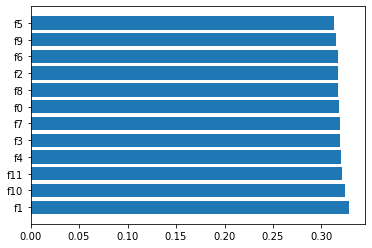

In [16]:
from uplift.tree import feature_importance

features = ['f0','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11']

dict_feat = feature_importance(df_features_imp,features,num_bins =1000,regularization = 1.0,penalty = False)

In [5]:
treatment_train = train.treatment
target_train = train.visit
train_features = train.drop('visit', 1) 
train_features = train_features.drop('treatment', 1) 

treatment_test = test.treatment
target_test = test.visit
test_features = test.drop('visit', 1) 
test_features = test_features.drop('treatment', 1) 

# 1) Solo(xgboost)


In [87]:
n_trees = 110
learning_rate = 0.045
subsample = [0.5, 0.75, 1.0]
colsample_bytree = [0.6, 0.8, 1.0]
max_depth = [4,6,8,10]




param_grid = {

            'subsample': subsample,
            'colsample_bytree': colsample_bytree,
            'max_depth': max_depth
    }

grid_list = list(ParameterGrid(param_grid))
grid_size = len(grid_list)
    
print(grid_list)
print(len(grid_list))

[{'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 0.5}, {'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 0.75}, {'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 1.0}, {'colsample_bytree': 0.6, 'max_depth': 6, 'subsample': 0.5}, {'colsample_bytree': 0.6, 'max_depth': 6, 'subsample': 0.75}, {'colsample_bytree': 0.6, 'max_depth': 6, 'subsample': 1.0}, {'colsample_bytree': 0.6, 'max_depth': 8, 'subsample': 0.5}, {'colsample_bytree': 0.6, 'max_depth': 8, 'subsample': 0.75}, {'colsample_bytree': 0.6, 'max_depth': 8, 'subsample': 1.0}, {'colsample_bytree': 0.6, 'max_depth': 10, 'subsample': 0.5}, {'colsample_bytree': 0.6, 'max_depth': 10, 'subsample': 0.75}, {'colsample_bytree': 0.6, 'max_depth': 10, 'subsample': 1.0}, {'colsample_bytree': 0.8, 'max_depth': 4, 'subsample': 0.5}, {'colsample_bytree': 0.8, 'max_depth': 4, 'subsample': 0.75}, {'colsample_bytree': 0.8, 'max_depth': 4, 'subsample': 1.0}, {'colsample_bytree': 0.8, 'max_depth': 6, 'subsample': 0.5}, {'colsample_byt

parametres =  {'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 0.5}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 52913029433.46115


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 0.75}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 53995211104.67258


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 1.0}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 51912359917.31433


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.6, 'max_depth': 6, 'subsample': 0.5}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 55198032921.506


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 0.6, 'max_depth': 6, 'subsample': 0.75}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 55554127478.03789


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 0.6, 'max_depth': 6, 'subsample': 1.0}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 55666619444.962555


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 0.6, 'max_depth': 8, 'subsample': 0.5}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 54128385583.5511


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.6, 'max_depth': 8, 'subsample': 0.75}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 53830473702.22897


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.6, 'max_depth': 8, 'subsample': 1.0}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 54925257785.843445


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.6, 'max_depth': 10, 'subsample': 0.5}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 52716673379.07123


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.6, 'max_depth': 10, 'subsample': 0.75}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 52593791991.291626


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.6, 'max_depth': 10, 'subsample': 1.0}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 53471874288.03606


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 4, 'subsample': 0.5}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 52223361240.23427


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 4, 'subsample': 0.75}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 52783105667.84053


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 4, 'subsample': 1.0}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 50776096564.44586


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 6, 'subsample': 0.5}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 56171911348.34599


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 0.8, 'max_depth': 6, 'subsample': 0.75}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 56161655976.58566


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 6, 'subsample': 1.0}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 55666333025.73921


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 8, 'subsample': 0.5}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 54548326649.982864


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 8, 'subsample': 0.75}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 54769916808.67967


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 8, 'subsample': 1.0}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 54762119044.32576


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 10, 'subsample': 0.5}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 52905654001.905655


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 10, 'subsample': 0.75}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 51813990994.74338


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 10, 'subsample': 1.0}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 52362736811.71962


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 1.0, 'max_depth': 4, 'subsample': 0.5}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 49088193934.73172


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 1.0, 'max_depth': 4, 'subsample': 0.75}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 50573853675.883575


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 1.0, 'max_depth': 4, 'subsample': 1.0}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 50843100190.32732


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 1.0, 'max_depth': 6, 'subsample': 0.5}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 55903036235.90282


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 1.0, 'max_depth': 6, 'subsample': 0.75}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 56995854802.78618


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 1.0, 'max_depth': 6, 'subsample': 1.0}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 56885135770.23901


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 1.0, 'max_depth': 8, 'subsample': 0.5}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 55120978549.44447


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 1.0, 'max_depth': 8, 'subsample': 0.75}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 55700837096.345535


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 1.0, 'max_depth': 8, 'subsample': 1.0}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 56312382581.118546


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 1.0, 'max_depth': 10, 'subsample': 0.5}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 51850860899.89613


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 1.0, 'max_depth': 10, 'subsample': 0.75}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 52564150640.238495


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 1.0, 'max_depth': 10, 'subsample': 1.0}
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
AUQC 50920346146.012695


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan


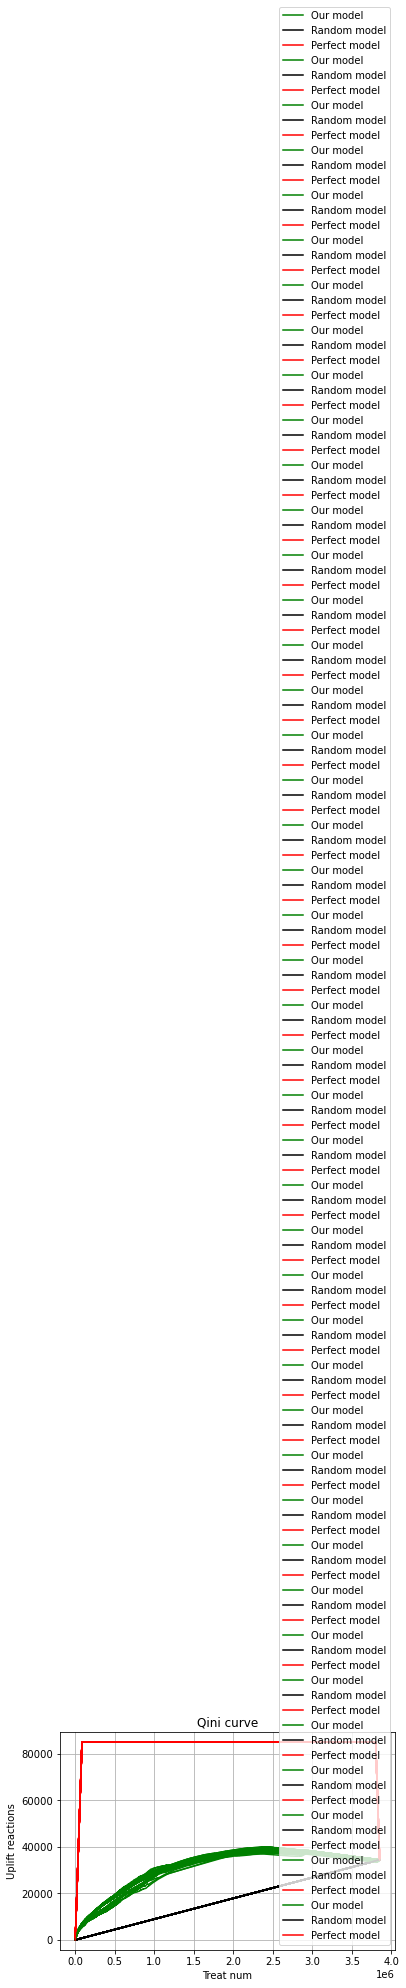

In [90]:
from uplift.models import SoloModel
import xgboost as xgb
from uplift.vizualization import  plot_qini_curve

scoring_solo = []
best_res = 0
 
for params in grid_list:
    print("parametres = ",params)
    clf = xgb.XGBClassifier(learning_rate = learning_rate, max_depth=params['max_depth'], 
                                      n_estimators=n_trees,subsample = params['subsample'] , colsample_bytree= params['colsample_bytree'])  
    sm = SoloModel(clf)
    sm = sm.fit(train_features, target_train, treatment_train)
    uplift_sm = sm.predict(test_features)
    plot_qini_curve(target_test,uplift_sm, treatment_test)
    cur_res = qini_auc_score(target_test,uplift_sm, treatment_test)
    print("AUQC",cur_res)
    print("uplift_30%",uplift_at_k(target_test,uplift_sm, treatment_test))
    scoring_solo.append(cur_res)
    if cur_res > best_res:
        best_res = cur_res
        best_param = params
        plot_qini_curve(target_test,uplift_sm, treatment_test)

In [92]:
print("best AUQC = ",best_res,"on parametr:",best_param)

best AUQC =  56995854802.78618 on parametr: {'colsample_bytree': 1.0, 'max_depth': 6, 'subsample': 0.75}


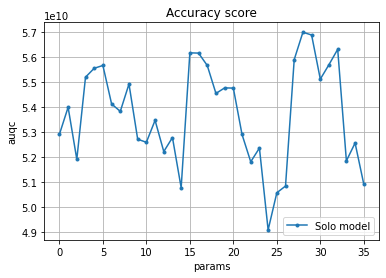

In [93]:
x_axis = [i for i in range(0,36)]
pylab.plot(x_axis, scoring_solo, marker='.', label='Solo model')
pylab.grid(True)
pylab.xlabel('params')
pylab.ylabel('auqc')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')


0
12
24
[[5.29130294e+10 5.39952111e+10 5.19123599e+10]
 [5.22233612e+10 5.27831057e+10 5.07760966e+10]
 [4.90881939e+10 5.05738537e+10 5.08431002e+10]]
3
15
27
[[5.51980329e+10 5.55541275e+10 5.56666194e+10]
 [5.61719113e+10 5.61616560e+10 5.56663330e+10]
 [5.59030362e+10 5.69958548e+10 5.68851358e+10]]
6
18
30
[[5.41283856e+10 5.38304737e+10 5.49252578e+10]
 [5.45483266e+10 5.47699168e+10 5.47621190e+10]
 [5.51209785e+10 5.57008371e+10 5.63123826e+10]]
9
21
33
[[5.27166734e+10 5.25937920e+10 5.34718743e+10]
 [5.29056540e+10 5.18139910e+10 5.23627368e+10]
 [5.18508609e+10 5.25641506e+10 5.09203461e+10]]


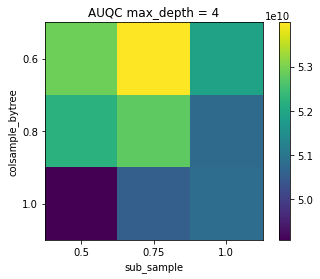

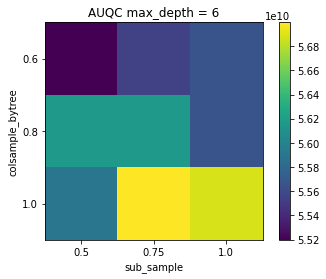

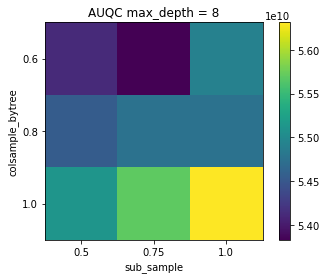

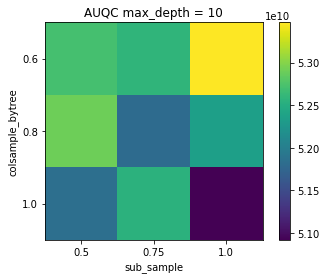

In [94]:

np_scoring_solo = np.array(scoring_solo)
colsample_subsample_depth4_solo = []
for i in range(0,36,12):
    print(i)
    colsample_subsample_depth4_solo.append(np_scoring_solo[i])
    colsample_subsample_depth4_solo.append(np_scoring_solo[i+1])
    colsample_subsample_depth4_solo.append(np_scoring_solo[i+2])
    
colsample_subsample_depth4_solo = np.array(colsample_subsample_depth4_solo).reshape(3,3)
print(colsample_subsample_depth4_solo)


fig, ax = plt.subplots()

img = ax.imshow(colsample_subsample_depth4_solo)

x_label_list = ['0.5', '0.75', '1.0']

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))

ax.set_xticklabels(x_label_list)

y_label_list = ['0.6', '0.8', '1.0']


ax.set_yticklabels(y_label_list)
plt.ylabel('colsample_bytree')
plt.xlabel('sub_sample')
plt.title('AUQC max_depth = 4')

fig.colorbar(img)

#____________________________________________________________________


colsample_subsample_depth6_solo = []
for i in range(3,36,12):
    print(i)
    colsample_subsample_depth6_solo.append(np_scoring_solo[i])
    colsample_subsample_depth6_solo.append(np_scoring_solo[i+1])
    colsample_subsample_depth6_solo.append(np_scoring_solo[i+2])
    
colsample_subsample_depth6_solo = np.array(colsample_subsample_depth6_solo).reshape(3,3)
print(colsample_subsample_depth6_solo)


fig, ax = plt.subplots()

img = ax.imshow(colsample_subsample_depth6_solo)

x_label_list = ['0.5', '0.75', '1.0']

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))

ax.set_xticklabels(x_label_list)

y_label_list = ['0.6', '0.8', '1.0']


ax.set_yticklabels(y_label_list)
plt.ylabel('colsample_bytree')
plt.xlabel('sub_sample')
plt.title('AUQC max_depth = 6')

fig.colorbar(img)

#____________________________________________________________________


colsample_subsample_depth8_solo = []
for i in range(6,36,12):
    print(i)
    colsample_subsample_depth8_solo.append(np_scoring_solo[i])
    colsample_subsample_depth8_solo.append(np_scoring_solo[i+1])
    colsample_subsample_depth8_solo.append(np_scoring_solo[i+2])
    
colsample_subsample_depth8_solo = np.array(colsample_subsample_depth8_solo).reshape(3,3)
print(colsample_subsample_depth8_solo)


fig, ax = plt.subplots()

img = ax.imshow(colsample_subsample_depth8_solo)

x_label_list = ['0.5', '0.75', '1.0']

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))

ax.set_xticklabels(x_label_list)

y_label_list = ['0.6', '0.8', '1.0']


ax.set_yticklabels(y_label_list)
plt.ylabel('colsample_bytree')
plt.xlabel('sub_sample')
plt.title('AUQC max_depth = 8')

fig.colorbar(img)

#____________________________________________________________________


colsample_subsample_depth10_solo = []
for i in range(9,36,12):
    print(i)
    colsample_subsample_depth10_solo.append(np_scoring_solo[i])
    colsample_subsample_depth10_solo.append(np_scoring_solo[i+1])
    colsample_subsample_depth10_solo.append(np_scoring_solo[i+2])
    
colsample_subsample_depth10_solo = np.array(colsample_subsample_depth10_solo).reshape(3,3)
print(colsample_subsample_depth10_solo)


fig, ax = plt.subplots()

img = ax.imshow(colsample_subsample_depth10_solo)

x_label_list = ['0.5', '0.75', '1.0']

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))

ax.set_xticklabels(x_label_list)

y_label_list = ['0.6', '0.8', '1.0']


ax.set_yticklabels(y_label_list)
plt.ylabel('colsample_bytree')
plt.xlabel('sub_sample')
plt.title('AUQC max_depth = 10')

fig.colorbar(img)

# 2) Class Transformation

In [20]:
n_trees = 110
learning_rate = 0.045
subsample = [0.5, 0.75, 1.0]
colsample_bytree = [0.6, 0.8, 1.0]
max_depth = [4,6,8,10]


max_features = [1.0]
max_samples = [0.9,0.7,0.5,0.3, 0.1]

param_grid = {

            'subsample': subsample,
            'colsample_bytree': colsample_bytree,
            'max_depth': max_depth
    }

grid_list = list(ParameterGrid(param_grid))
grid_size = len(grid_list)
    
print(grid_list)
print(len(grid_list))

[{'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 0.5}, {'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 0.75}, {'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 1.0}, {'colsample_bytree': 0.6, 'max_depth': 6, 'subsample': 0.5}, {'colsample_bytree': 0.6, 'max_depth': 6, 'subsample': 0.75}, {'colsample_bytree': 0.6, 'max_depth': 6, 'subsample': 1.0}, {'colsample_bytree': 0.6, 'max_depth': 8, 'subsample': 0.5}, {'colsample_bytree': 0.6, 'max_depth': 8, 'subsample': 0.75}, {'colsample_bytree': 0.6, 'max_depth': 8, 'subsample': 1.0}, {'colsample_bytree': 0.6, 'max_depth': 10, 'subsample': 0.5}, {'colsample_bytree': 0.6, 'max_depth': 10, 'subsample': 0.75}, {'colsample_bytree': 0.6, 'max_depth': 10, 'subsample': 1.0}, {'colsample_bytree': 0.8, 'max_depth': 4, 'subsample': 0.5}, {'colsample_bytree': 0.8, 'max_depth': 4, 'subsample': 0.75}, {'colsample_bytree': 0.8, 'max_depth': 4, 'subsample': 1.0}, {'colsample_bytree': 0.8, 'max_depth': 6, 'subsample': 0.5}, {'colsample_byt

parametres =  {'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 0.5}
AUQC 8718980215.759949


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 0.75}
AUQC 8611132241.637283


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 1.0}
AUQC 8625440473.660217
uplift_30% nan
parametres =  {'colsample_bytree': 0.6, 'max_depth': 6, 'subsample': 0.5}
AUQC 11476443555.39885
uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 0.6, 'max_depth': 6, 'subsample': 0.75}
AUQC 11589274421.434784


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 0.6, 'max_depth': 6, 'subsample': 1.0}
AUQC 11285801168.058975


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.6, 'max_depth': 8, 'subsample': 0.5}
AUQC 12062835827.304733
uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 0.6, 'max_depth': 8, 'subsample': 0.75}
AUQC 12178667254.553726


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 0.6, 'max_depth': 8, 'subsample': 1.0}
AUQC 12348395911.149002


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 0.6, 'max_depth': 10, 'subsample': 0.5}
AUQC 12757039948.07193


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 0.6, 'max_depth': 10, 'subsample': 0.75}
AUQC 12844637268.378998


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'colsample_bytree': 0.6, 'max_depth': 10, 'subsample': 1.0}
AUQC 12736302499.976593


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 4, 'subsample': 0.5}
AUQC 9033328347.347748
uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 4, 'subsample': 0.75}
AUQC 9015184628.258163
uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 4, 'subsample': 1.0}
AUQC 9203686513.50438
uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 6, 'subsample': 0.5}
AUQC 11348294360.873123
uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 6, 'subsample': 0.75}
AUQC 11418936409.673355
uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 6, 'subsample': 1.0}
AUQC 11628938766.820206
uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 8, 'subsample': 0.5}
AUQC 12331111589.850357
uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 8, 'subsample': 0.75}
AUQC 12387771057.89032
uplift_30% nan
parametres =  {'colsample_bytree': 0.8, 'max_depth': 8, 'subsample': 1.0}
AUQC 1242

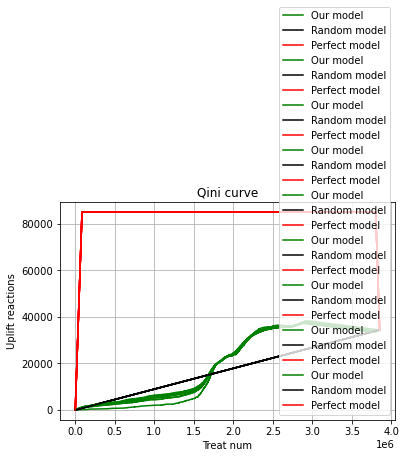

In [15]:
from uplift.models import  ClassTransformation
import xgboost as xgb
from uplift.vizualization import  plot_qini_curve

scoring = []
best_res = 0

for params in grid_list:
    
 
    print("parametres = ", params)
    clf = xgb.XGBClassifier(learning_rate=learning_rate, max_depth=params['max_depth'], 
                                      n_estimators=n_trees,min_split_gain = 0,subsample = params['subsample'] ,colsample_bytree = params['colsample_bytree'])  
    ct =  ClassTransformation(clf)
    ct = ct.fit(train_features, target_train, treatment_train)
    uplift_ct = ct.predict(test_features)
    
    cur_res = qini_auc_score(target_test,uplift_ct, treatment_test)
    print("AUQC", cur_res)
    print("uplift_30%",uplift_at_k(target_test,uplift_ct, treatment_test))
    scoring.append(cur_res)
    if cur_res > best_res:
        best_res = cur_res
        best_param = params
        plot_qini_curve(target_test,uplift_ct, treatment_test)

best AUQC =  12934316328.183289  on parametres =  {'colsample_bytree': 1.0, 'max_depth': 10, 'subsample': 1.0}


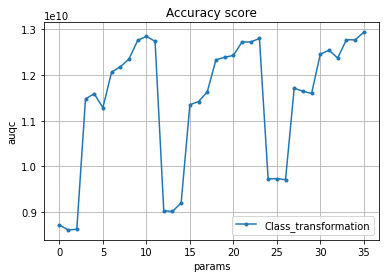

In [24]:
x_axis = [i for i in range(0,36)]
pylab.plot(x_axis, scoring, marker='.', label='Class_transformation')
pylab.grid(True)
pylab.xlabel('params')
pylab.ylabel('auqc')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

print("best AUQC = ",best_res," on parametres = ",best_param)

1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0


<module 'pylab' from 'c:\\python38\\lib\\site-packages\\pylab.py'>

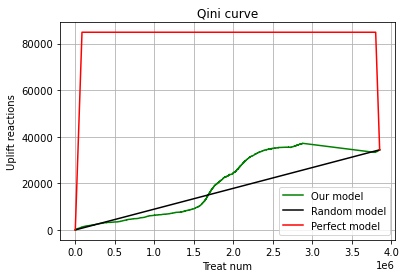

In [25]:



clf = xgb.XGBClassifier(learning_rate=learning_rate, max_depth=10, 
                                      n_estimators=n_trees,min_split_gain = 0,subsample = 1.0 ,colsample_bytree = 1.0)  
ct =  ClassTransformation(clf)
ct = ct.fit(train_features, target_train, treatment_train)
uplift_ct = ct.predict(test_features)

plot_qini_curve(target_test,uplift_ct, treatment_test)

In [39]:
print(scoring)
print(grid_list)

[8718980215.759949, 8611132241.637283, 8625440473.660217, 11476443555.39885, 11589274421.434784, 11285801168.058975, 12062835827.304733, 12178667254.553726, 12348395911.149002, 12757039948.07193, 12844637268.378998, 12736302499.976593, 9033328347.347748, 9015184628.258163, 9203686513.50438, 11348294360.873123, 11418936409.673355, 11628938766.820206, 12331111589.850357, 12387771057.89032, 12426453679.641647, 12721844386.187943, 12721643883.939484, 12797568627.52333, 9726058711.977936, 9732338763.912415, 9708499114.837433, 11712932042.045227, 11643033483.005249, 11595887524.51564, 12456637854.026443, 12539980189.142471, 12370465694.62709, 12770394552.175903, 12767431846.957901, 12934316328.183289]
[{'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 0.5}, {'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 0.75}, {'colsample_bytree': 0.6, 'max_depth': 4, 'subsample': 1.0}, {'colsample_bytree': 0.6, 'max_depth': 6, 'subsample': 0.5}, {'colsample_bytree': 0.6, 'max_depth': 6, 'subsam

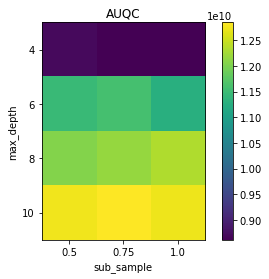

In [69]:
arr_scoring = np.array(scoring)
# print(arr_scoring)
depth_subsample = arr_scoring[:12].reshape(4,3)


fig, ax = plt.subplots()

img = ax.imshow(depth_subsample)

x_label_list = ['0.5', '0.75', '1.0']

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(4))

ax.set_xticklabels(x_label_list)

y_label_list = ['4', '6', '8', '10']


ax.set_yticklabels(y_label_list)
plt.ylabel('max_depth')
plt.xlabel('sub_sample')
plt.title('AUQC')

fig.colorbar(img)

[8718980215.759949, 8611132241.637283, 8625440473.660217, 11476443555.39885, 11589274421.434784, 11285801168.058975, 12062835827.304733, 12178667254.553726, 12348395911.149002, 12757039948.07193, 12844637268.378998, 12736302499.976593, 9033328347.347748, 9015184628.258163, 9203686513.50438, 11348294360.873123, 11418936409.673355, 11628938766.820206, 12331111589.850357, 12387771057.89032, 12426453679.641647, 12721844386.187943, 12721643883.939484, 12797568627.52333, 9726058711.977936, 9732338763.912415, 9708499114.837433, 11712932042.045227, 11643033483.005249, 11595887524.51564, 12456637854.026443, 12539980189.142471, 12370465694.62709, 12770394552.175903, 12767431846.957901, 12934316328.183289]
0
12
24
[[8.71898022e+09 8.61113224e+09 8.62544047e+09]
 [9.03332835e+09 9.01518463e+09 9.20368651e+09]
 [9.72605871e+09 9.73233876e+09 9.70849911e+09]]
3
15
27
[[1.14764436e+10 1.15892744e+10 1.12858012e+10]
 [1.13482944e+10 1.14189364e+10 1.16289388e+10]
 [1.17129320e+10 1.16430335e+10 1.1595

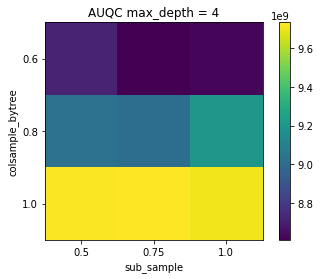

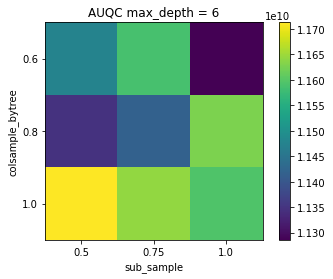

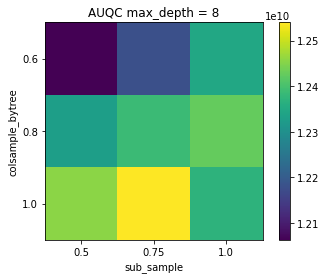

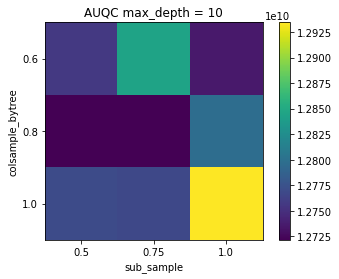

In [86]:
print(scoring)
np_scoring = np.array(scoring)
colsample_subsample_depth4 = []
for i in range(0,36,12):
    print(i)
    colsample_subsample_depth4.append(np_scoring[i])
    colsample_subsample_depth4.append(np_scoring[i+1])
    colsample_subsample_depth4.append(np_scoring[i+2])
    
colsample_subsample_depth4 = np.array(colsample_subsample_depth4).reshape(3,3)
print(colsample_subsample_depth4)


fig, ax = plt.subplots()

img = ax.imshow(colsample_subsample_depth4)

x_label_list = ['0.5', '0.75', '1.0']

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))

ax.set_xticklabels(x_label_list)

y_label_list = ['0.6', '0.8', '1.0']


ax.set_yticklabels(y_label_list)
plt.ylabel('colsample_bytree')
plt.xlabel('sub_sample')
plt.title('AUQC max_depth = 4')

fig.colorbar(img)

#____________________________________________________________________

np_scoring = np.array(scoring)
colsample_subsample_depth6 = []
for i in range(3,36,12):
    print(i)
    colsample_subsample_depth6.append(np_scoring[i])
    colsample_subsample_depth6.append(np_scoring[i+1])
    colsample_subsample_depth6.append(np_scoring[i+2])
    
colsample_subsample_depth6 = np.array(colsample_subsample_depth6).reshape(3,3)
print(colsample_subsample_depth6)


fig, ax = plt.subplots()

img = ax.imshow(colsample_subsample_depth6)

x_label_list = ['0.5', '0.75', '1.0']

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))

ax.set_xticklabels(x_label_list)

y_label_list = ['0.6', '0.8', '1.0']


ax.set_yticklabels(y_label_list)
plt.ylabel('colsample_bytree')
plt.xlabel('sub_sample')
plt.title('AUQC max_depth = 6')

fig.colorbar(img)

#____________________________________________________________________

np_scoring = np.array(scoring)
colsample_subsample_depth8 = []
for i in range(6,36,12):
    print(i)
    colsample_subsample_depth8.append(np_scoring[i])
    colsample_subsample_depth8.append(np_scoring[i+1])
    colsample_subsample_depth8.append(np_scoring[i+2])
    
colsample_subsample_depth8 = np.array(colsample_subsample_depth8).reshape(3,3)
print(colsample_subsample_depth8)


fig, ax = plt.subplots()

img = ax.imshow(colsample_subsample_depth8)

x_label_list = ['0.5', '0.75', '1.0']

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))

ax.set_xticklabels(x_label_list)

y_label_list = ['0.6', '0.8', '1.0']


ax.set_yticklabels(y_label_list)
plt.ylabel('colsample_bytree')
plt.xlabel('sub_sample')
plt.title('AUQC max_depth = 8')

fig.colorbar(img)

#____________________________________________________________________

np_scoring = np.array(scoring)
colsample_subsample_depth10 = []
for i in range(9,36,12):
    print(i)
    colsample_subsample_depth10.append(np_scoring[i])
    colsample_subsample_depth10.append(np_scoring[i+1])
    colsample_subsample_depth10.append(np_scoring[i+2])
    
colsample_subsample_depth10 = np.array(colsample_subsample_depth10).reshape(3,3)
print(colsample_subsample_depth10)


fig, ax = plt.subplots()

img = ax.imshow(colsample_subsample_depth10)

x_label_list = ['0.5', '0.75', '1.0']

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))

ax.set_xticklabels(x_label_list)

y_label_list = ['0.6', '0.8', '1.0']


ax.set_yticklabels(y_label_list)
plt.ylabel('colsample_bytree')
plt.xlabel('sub_sample')
plt.title('AUQC max_depth = 10')

fig.colorbar(img)

# uplift trees


In [15]:
criterions = ["uplift_gini"]
min_samples_leaf = [1000,10000,100000]

max_features = [0.1,0.5,1.0]


param_grid = {

            'criterion': criterions,
            'min_samples_leaf': min_samples_leaf,
            'max_features': max_features
}

grid_list_rf = list(ParameterGrid(param_grid))
grid_size = len(grid_list_rf)
print(grid_list_rf)

[{'criterion': 'uplift_gini', 'max_features': 0.1, 'min_samples_leaf': 1000}, {'criterion': 'uplift_gini', 'max_features': 0.1, 'min_samples_leaf': 10000}, {'criterion': 'uplift_gini', 'max_features': 0.1, 'min_samples_leaf': 100000}, {'criterion': 'uplift_gini', 'max_features': 0.5, 'min_samples_leaf': 1000}, {'criterion': 'uplift_gini', 'max_features': 0.5, 'min_samples_leaf': 10000}, {'criterion': 'uplift_gini', 'max_features': 0.5, 'min_samples_leaf': 100000}, {'criterion': 'uplift_gini', 'max_features': 1.0, 'min_samples_leaf': 1000}, {'criterion': 'uplift_gini', 'max_features': 1.0, 'min_samples_leaf': 10000}, {'criterion': 'uplift_gini', 'max_features': 1.0, 'min_samples_leaf': 100000}]


In [ ]:
from uplift.ensemble import RandomForestClassifier

from uplift.vizualization import  plot_qini_curve

scoring_up_rf = []
best_res_up_rf = 0

for params in grid_list_rf:
    
 
    print("parametres = ", params)
      
    up_rf =  RandomForestClassifier(n_estimators = 100, min_samples_leaf = params['min_samples_leaf'], 
                                    max_features = params['max_features']
                                    , criterion=params['criterion'],n_jobs=-1,bootstrap=True)
    
    up_rf = up_rf.fit(train_features, target_train, treatment_train)
    uplift_up_rf = up_rf.predict_uplift(test_features)
    
    cur_res = qini_auc_score(target_test,uplift_up_rf, treatment_test)
    print("AUQC", cur_res)
    print("uplift_30%",uplift_at_k(target_test,uplift_up_rf, treatment_test,rate=0.3))
    scoring_up_rf.append(cur_res)
    if cur_res > best_res_up_rf:
        best_res_up_rf = cur_res
        best_param_up_rf = params
        plot_qini_curve(target_test,uplift_up_rf, treatment_test)

parametres =  {'criterion': 'uplift_gini', 'max_features': 0.1, 'min_samples_leaf': 1000}
AUQC 56140677448.28409


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
1 point 84847 84847.0
2 point 3802538 84847.0
3 point 3853008 34377.0
parametres =  {'criterion': 'uplift_gini', 'max_features': 0.1, 'min_samples_leaf': 10000}
AUQC 55043905171.14151


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'criterion': 'uplift_gini', 'max_features': 0.1, 'min_samples_leaf': 100000}
AUQC 54644071846.51399


c:\python38\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


uplift_30% nan
parametres =  {'criterion': 'uplift_gini', 'max_features': 0.5, 'min_samples_leaf': 1000}


In [ ]:
up_rf =  RandomForestClassifier(n_estimators = 110,max_depth=4, 
                                    max_features = params['max_features']
                                    , criterion=params['criterion'])
    
    up_rf = up_rf.fit(train_features, target_train, treatment_train)
    uplift_up_rf = up_rf.predict_uplift(test_features)
    
    cur_res = qini_auc_score(target_test,uplift_up_rf, treatment_test)
    print("AUQC", cur_res)
    print("uplift_30%",uplift_at_k(target_test,uplift_up_rf, treatment_test))